# CF3E1 - Final Project

Project Name: 2 Bit Adder with Memory Cells

Course: CF3E1A - Circuitos Electrónicos Analógicos

Students:
* Gomez Mejia Gabriel Arturo
* Lozano Acuña Gustavo Jair


### Description
Build a 2-bit adder with memory cells using only analog components.


---
#### References
- Microelectronics Circuit Analysis and Design, Fourth Edition (Donald A. Neamen)
- CMOS Digital Integrated Circuits Analysis Design (Sung-Mo Kang, Yusuf Leblebici)
- Digital Fundamentals 11ed (Thomas L. Floyd)
- [VLSI - Lecture 8a: SRAM - Introduction](https://www.youtube.com/watch?v=Ji2Tu7Oktaw)
- [VLSI - Lecture 8b: The 6T SRAM Bitcell](https://www.youtube.com/watch?v=P78GNkk_00s)
- [VLSI - Lecture 8c: 6T SRAM Operation](https://www.youtube.com/watch?v=leosGXihlVI)

## Introduction
Logic gates are the building block of digital systems (like processor, memory, ...).

VLSI circuits

### Objecttives

* Understand the working principles of MOSFET
* 

## Theoretical foundation


### MOS capacitor

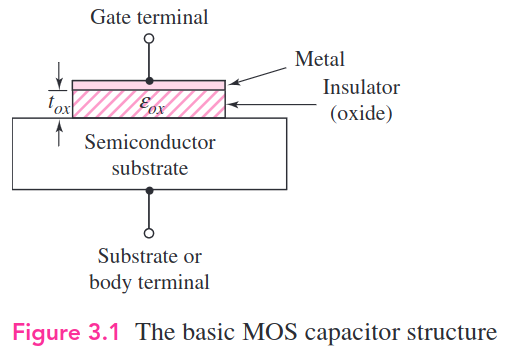

#### Inducted inversion layer

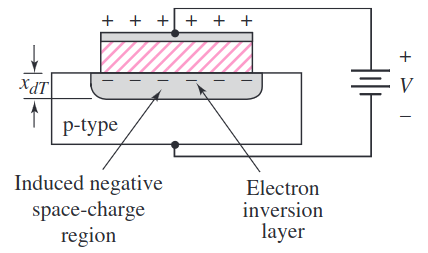




### Mosfets

The current in a MOSFET is the result of the flow of charge in the inver-
sion layer, also called the **channel region**, adjacent to the oxide–semiconductor
interface.


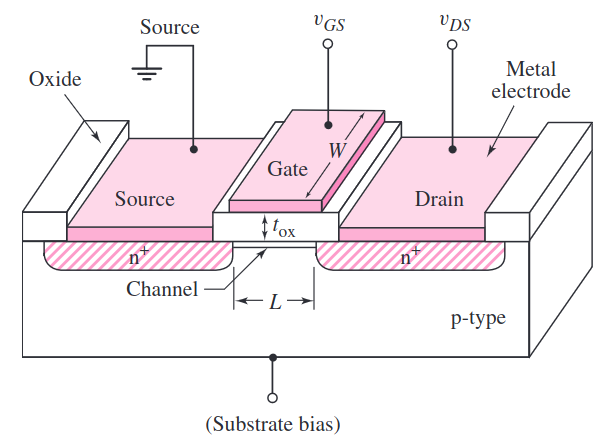



#### n-Channel Enhancement-Mode MOSFET

#### n-Channel Depletion-Mode MOSFET

### Full Adder

#### Full Adder - Truth Table
We want to build a circuit that given the bits $A$, $B$ and a *carrier* ($C_{in}$) computes $SUM = A + B$ (in table $S$ is the less significant bit of *SUM* and $C_{out}$ the more significant one)


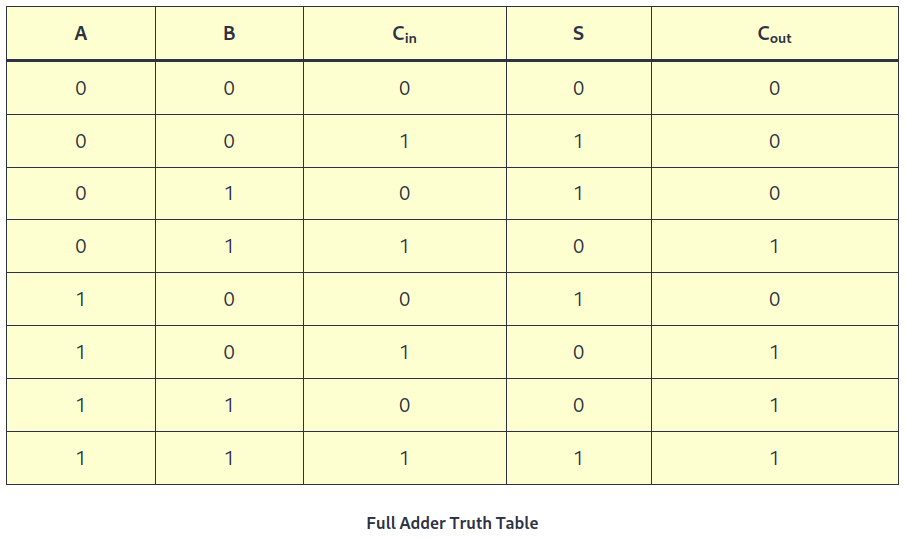



#### Full Adder - Boolean Algebra


From the truth table we can derivate (**SOP**: Sum of Products). The following expression for $S$.

$$ S = \bar{A}\bar{B}C_{in} + \bar{A}B\bar{C_{in}} + A\bar{B}\bar{C_{in}} + ABC_{cin}$$

Using **Karnaugh Map** to reduce the expression of $S$.

IMAGE-KARNAUGH-MAP-FOR-S-EXPRESSION

We can notice that this expression is the more simplified one. But this is the more cost-efficient way of implement this circuit. 
Let's count the number of transistors that should be used to build it.

In [30]:
transistors = 0

* $\bar{A}\bar{B}C_{in}$ - 2 **inverters** (2 transistors by inverter), 2 **AND* gates (2 **NAND** gates, where we need 3 transitors by *NAND* gate), 2 **OR** gates (2 **NOR** gates, where we need 3 transistors by *NOR* gate) 

In [31]:
x = 2*2 + 2*2*3 + 2*2*3
transistors += x
x

28

* $\bar{A}B\bar{C_{in}}$ - 2 **inverters** (2 transistors by inverter), 2 **AND* gates (2 **NAND** gates, where we need 3 transitors by *NAND* gate), 2 **OR** gates (2 **NOR** gates, where we need 3 transistors by *NOR* gate) 

In [32]:
x = 2*2 + 2*2*3 + 2*2*3
transistors += x
x

28

* $A\bar{B}\bar{C_{in}}$ - 2 **inverters** (2 transistors by inverter), 2 **AND* gates (2 **NAND** gates, where we need 3 transitors by *NAND* gate), 2 **OR** gates (2 **NOR** gates, where we need 3 transistors by *NOR* gate) 

In [33]:
x = 2*2 + 2*2*3 + 2*2*3
transistors += x
x

28

* $ABC_{cin}$ - 2 **AND* gates (2 **NAND** gates, where we need 3 transitors by *NAND* gate), 2 **OR** gates (2 **NOR** gates, where we need 3 transistors by *NOR* gate) 

In [34]:
x = 2*2*3 + 2*2*3
transistors += x
x

24

In [35]:
transistors

108

If well this expression is the more reduced one, it is not practical for implementation. Let's try to find a more compact expression that reduce the number of transistors.

$$
\begin{align}
    S  &= \bar{A}\bar{B}C_{in} + \bar{A}B\bar{C_{in}} + A\bar{B}\bar{C_{in}} + AB C_{in} \\
     &= C_{in}\left[\bar{A}\bar{B} + AB\right] + A\bar{B}\bar{C_{in}} + \bar{A}B\bar{C_{in}} \\
     &= C_{in}\left[(\bar{A} + B)(A + \bar{B})\right] + \bar{C_{in}}(A\bar{B} + \bar{A}B) \\
     &= C_{in}\left[\bar{A\bar{B}}\bar{\bar{A}B}\right] + \bar{C_{in}}(A\bar{B} + \bar{A}B) \\
     &= C_{in}\bar{(A\bar{B} + \bar{A}B)} + \bar{C_{in}}(A\bar{B} + \bar{A}B) \\
     &= C_{in} \oplus \left[A\bar{B} + \bar{A}B\right] \\
     &= C_{in} \oplus (A \oplus B)
\end{align}
$$

Now, let's count the number of transistor used to implement this expression.

In [36]:
transistors = 0

* $A \oplus B$ - 2 **inverters** (2 transistors by inverter) and 5 transistors by **XOR** gate.

In [37]:
x = 2*2 + 5
transistors += 2*x # we are going to use 'x' transistors on A XOR B and other 'x' transistors on C_in XOR (A XOR B)
x

9

In [38]:
transistors

18

It is clear that the second expression is more appropiated way (last one uses **108 transistors**) to implement the expression $S$

Similarly, let's find the more suitable expression for $C_{out}$. From the truth table, we have this initial expression:

$C_{out} = \bar{A}BC_{in} + A\bar{B}C_{in} + AB\bar{C_{in}} + ABC_{in}$

Let's use **Karnaugh Map** to reduce the below expression.

IMAGE-KARNAUGH-MAP-FOR-COUT-EXPRESSION

From *Karnaugh Map* we have the following reduced expression:

$$C_{out} = AB + BC + AC$$
To implement this expression we need 3 **AND** gates and 2 **OR** gates.

Let's try to find a more optimal expression to implement $C_{out}$

$$
\begin{align}
    C_{out} &= \bar{A}BC_{in} + A\bar{B}C_{in} + AB\bar{C_{in}} + ABC_{in} \\
    &= C_{in}(\bar{A}B + A\bar{B}) + AB(C_{in} + \bar{C_{in}}) \\
    &= C_{in}(\bar{A}B + A\bar{B}) + AB \\
    &= AB + C_{in}(A \oplus B)
\end{align}
$$

In this expression we need 2 **AND** gate, 1 **OR** gate and 1 **XOR** (that we can **reuse** from $S$ expression). 

Therefore we only need 2 **AND** gate, 1 **OR** gate (1 less **AND** gate and 1 less **OR** gate that the expression extracted from *Karnaugh Map*).

#### Full Adder - Logical Gates Circuit

From the derived expressions our *full-adder* circuit (in term of logical gates) is show in the following diagram:

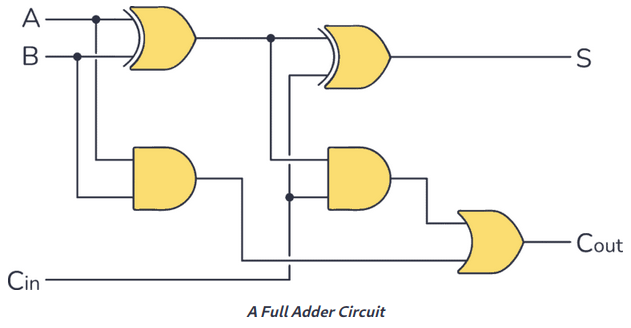


### Two Bits Adder

How can I add more than *one bit*?

Well, just chain together several `Full Adders` and make the first `carry = 0`. For example a 2-bits adder looks like this:

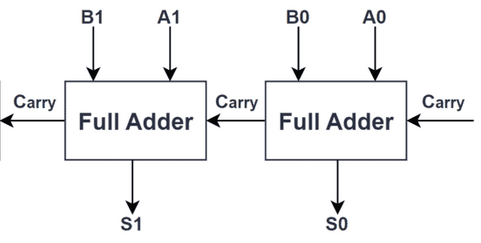

## How does a Logical Gate is build?

They are build from `fundamental` gates like **NOR** or **NAND** that are build using transistors (MOSFTER or BJT) or directly using transistors like the *fundamental* ones.

* **AND** Logical Gate (based on **NAND** gates)

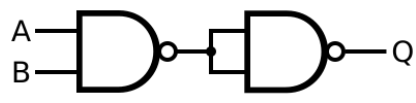

* **OR** Gate (based on **NOR** gates)

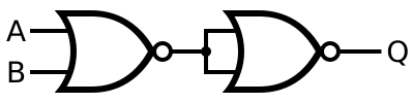

## Defining a bit

Based on [wikipedia](https://en.wikipedia.org/wiki/Bit):
> The bit is the most basic unit of information in computing and digital communication.

But, How can we represent a bit using a physical quantity (like voltage)?



## Logic gates

### Inverter



Since `XOR` gate needs inverted signals. We are going to build `inverter` gates. In specific we are going to build an `NMOS Inverter with Depletion Load`, show in the following schematic:

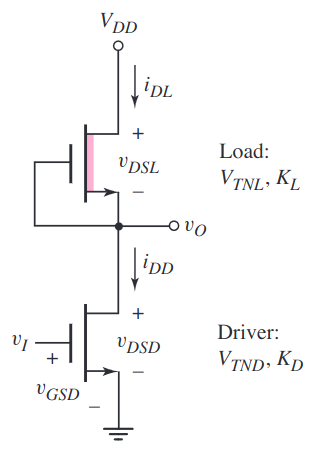

* If $ v_i 	\le V_{TN}$

Given that $v_i = V_{GSD} < V_{TN}$, then the **driver** is in cut off and $i_{DD} = 0$, this implies that $i_{DL} = 0$. Therefore for $V_i = V_{GSD} 	\le V_{TN}$, then $v_o = V_{DD}$

* If $v_i > V_{TN}$

### XOR Gate



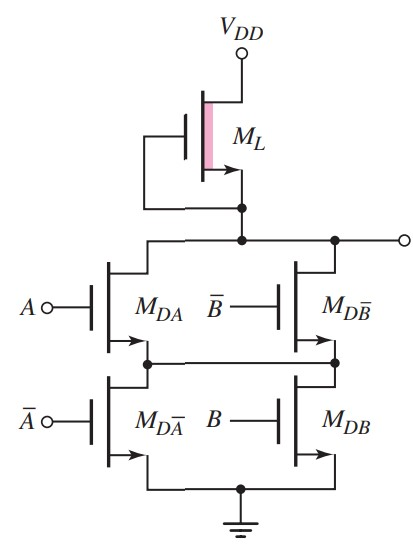

### NOR Gate


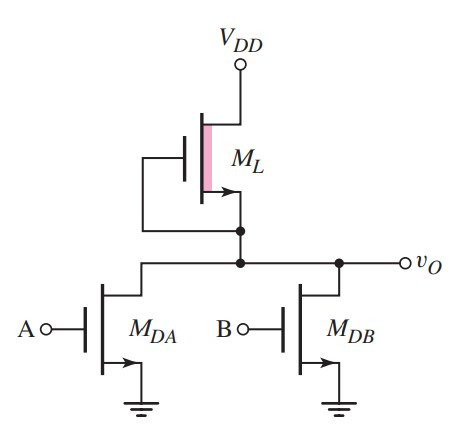

## Memory

### NMOS SRAM Cells